In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv("1730285881-Airbnb_Open_Data.csv", low_memory = False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [5]:
df.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

In [6]:
#Data Cleaning
# Drop house_rules and license columns with insufficient data
df.drop(['house_rules', 'license'], axis=1, inplace=True)

# Remove all dollar signs and commas in the price and service fee columns
df['price'] = df['price'].fillna('0').astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['service fee'] = df['service fee'].fillna('0').astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)

# Rename the price and service fee columns to include a dollar sign
df.rename(columns={
    'price': 'price_$',
    'service fee': 'service_fee_$',
    'Construction year': 'construction_year',
    'host id': 'host_id',
    'neighbourhood group': 'neighbourhood_group',
    'last review': 'last_review',
    'availability 365': 'availability_365'
}, inplace=True)

# Drop all records with missing values
df.dropna(inplace=True)

# Change all mismatched data types to the appropriate ones
df['price_$'] = df['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float)
df['id'] = df['id'].astype(str)
df['host_id'] = df['host_id'].astype(str)
df['last_review'] = pd.to_datetime(df['last_review'])
df['construction_year'] = df['construction_year'].astype(int)

# Correct the spelling of 'brookin' to 'brooklyn' 
if 'neighbourhood_group' in df.columns:
    df.loc[df['neighbourhood_group'] == 'brookin', 'neighbourhood_group'] = 'brooklyn'

# Get rid of outliers in the 'availability_365' column data
df = df[df['availability_365'] <= 365]

# Check for duplicates
print("Duplicates:", df.duplicated().value_counts())


df.info()

Duplicates: False    81656
True       443
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 82099 entries, 0 to 102593
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              82099 non-null  object        
 1   NAME                            82099 non-null  object        
 2   host_id                         82099 non-null  object        
 3   host_identity_verified          82099 non-null  object        
 4   host name                       82099 non-null  object        
 5   neighbourhood_group             82099 non-null  object        
 6   neighbourhood                   82099 non-null  object        
 7   lat                             82099 non-null  float64       
 8   long                            82099 non-null  float64       
 9   country                         82099 non-null  object        
 10  countr

In [7]:
# Drop duplicate records
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().value_counts()

False    81656
Name: count, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81656 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              81656 non-null  object        
 1   NAME                            81656 non-null  object        
 2   host_id                         81656 non-null  object        
 3   host_identity_verified          81656 non-null  object        
 4   host name                       81656 non-null  object        
 5   neighbourhood_group             81656 non-null  object        
 6   neighbourhood                   81656 non-null  object        
 7   lat                             81656 non-null  float64       
 8   long                            81656 non-null  float64       
 9   country                         81656 non-null  object        
 10  country code                    81656 non-null  object        
 11  instan

In [10]:
#Exploratory Data Analysis
df.describe()

,lat,long,construction_year,price_$,service_fee_$,minimum nights,number of reviews,last_review,reviews per month,review rate number,calculated host listings count,availability_365
count,81656.000000,81656.000000,81656.000000,81656.000000,81656.000000,81656.000000,81656.000000,81656,81656.000000,81656.000000,81656.000000,81656.000000
mean,40.727265,-73.948260,2012.492272,625.272925,124.975544,7.448736,31.991158,2019-06-21 23:29:37.956304128,1.389430,3.286629,7.124253,135.033568
min,40.504560,-74.249840,2003.000000,0.000000,0.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687630,-73.982060,2008.000000,339.000000,68.000000,2.000000,3.000000,2018-11-05 00:00:00,0.230000,2.000000,1.000000,5.000000
50%,40.721260,-73.953590,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-15 00:00:00,0.760000,3.000000,1.000000,92.000000
75%,40.762482,-73.930460,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-06 00:00:00,2.030000,4.000000,2.000000,253.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,365.000000
std,0.056380,0.050627,5.761010,332.748107,66.577622,28.381469,51.615382,NaN,1.759622,1.278616,29.864677,128.477954



1. PROPERTY TYPES ANALYSIS
room type
Entire home/apt    43130
Private room       36793
Shared room         1623
Hotel room           110
Name: count, dtype: int64


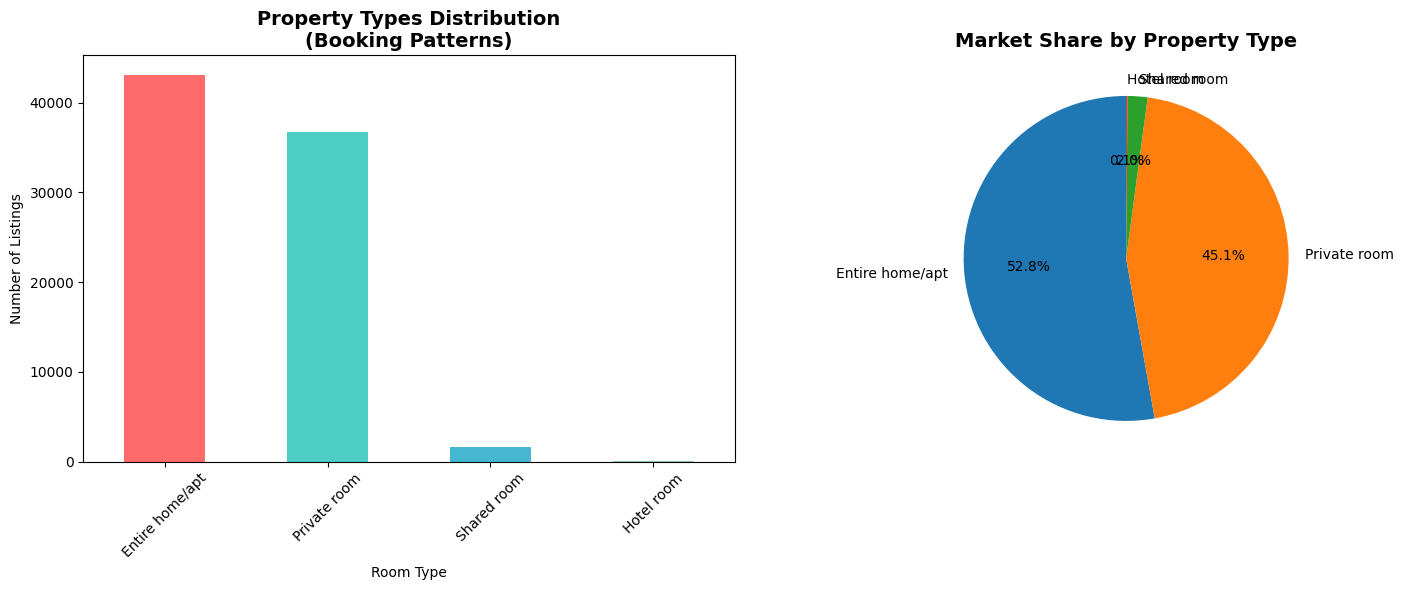

In [11]:
# 1. What are the different property types?
print("\n" + "="*50)
print("1. PROPERTY TYPES ANALYSIS")
print("="*50)
property_types = df['room type'].value_counts()
print(property_types)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart
property_types.plot(kind='bar', ax=ax1, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
ax1.set_title('Property Types Distribution\n(Booking Patterns)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Room Type')
ax1.set_ylabel('Number of Listings')
ax1.tick_params(axis='x', rotation=45)

# Pie chart
ax2.pie(property_types.values, labels=property_types.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Market Share by Property Type', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


2. NEIGHBORHOOD MARKET SHARE
neighbourhood_group
Brooklyn         33874
Manhattan        33714
Queens           11007
Bronx             2250
Staten Island      810
brookln              1
Name: count, dtype: int64


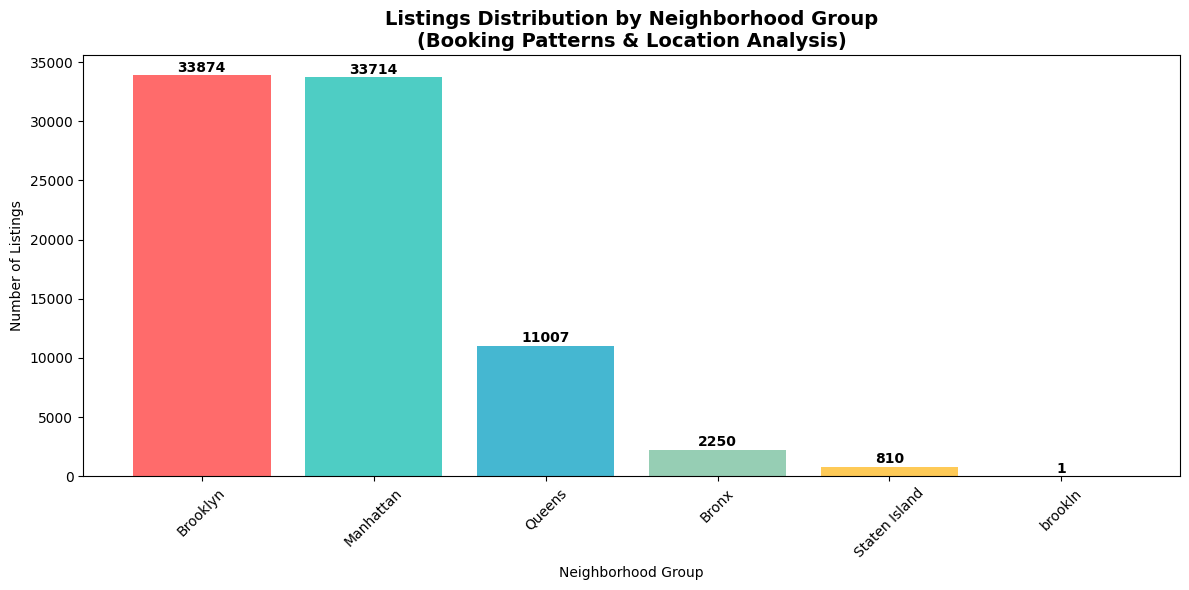

In [12]:
# 2. Which neighborhood group has the most listings?
print("\n" + "="*50)
print("2. NEIGHBORHOOD MARKET SHARE")
print("="*50)
neighborhood_counts = df['neighbourhood_group'].value_counts()
print(neighborhood_counts)

plt.figure(figsize=(12, 6))
bars = plt.bar(neighborhood_counts.index, neighborhood_counts.values, 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57'])
plt.title('Listings Distribution by Neighborhood Group\n(Booking Patterns & Location Analysis)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)

for i, v in enumerate(neighborhood_counts.values):
    plt.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()


3. PRICING STRATEGIES BY LOCATION
                       mean  median     std
neighbourhood_group                        
Bronx                629.17   641.5  325.49
Queens               628.19   628.0  336.68
Brooklyn             626.51   625.0  332.82
Manhattan            622.94   622.0  331.99
Staten Island        620.19   623.0  327.70
brookln              580.00   580.0     NaN


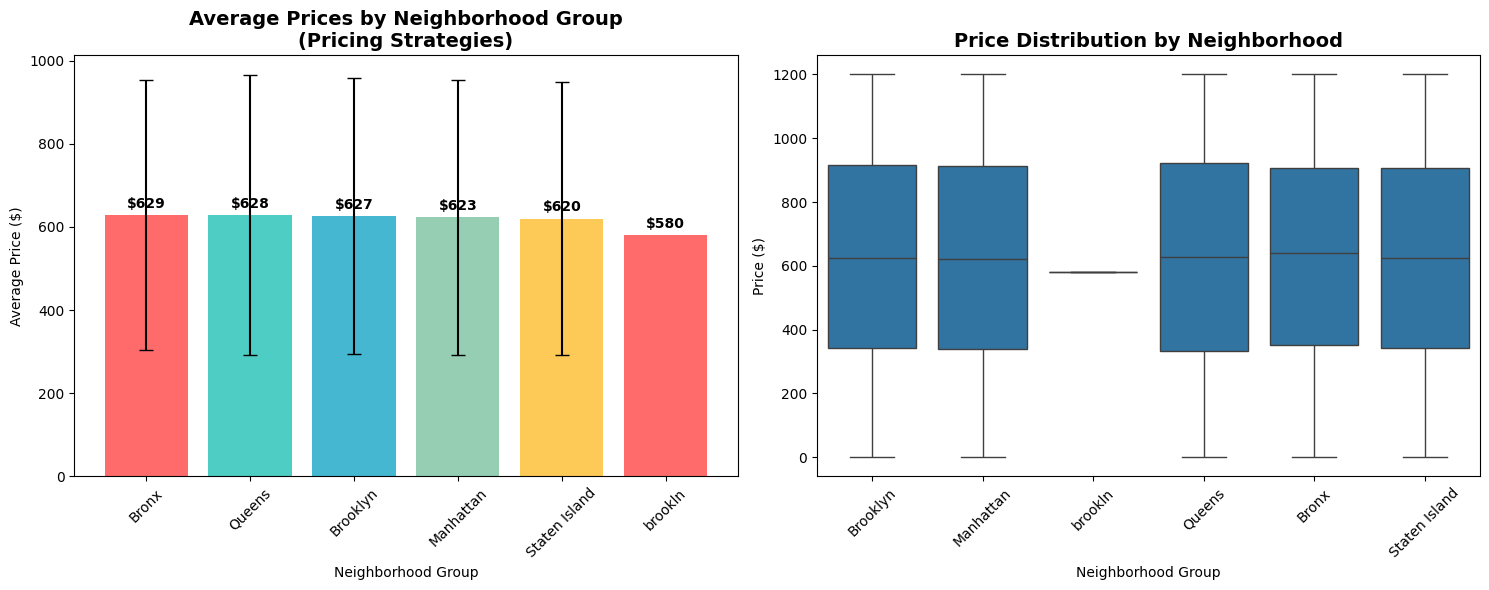

In [13]:
 #3. Which neighborhood group has highest average prices?
print("\n" + "="*50)
print("3. PRICING STRATEGIES BY LOCATION")
print("="*50)
avg_prices = df.groupby('neighbourhood_group')['price_$'].agg(['mean', 'median', 'std']).round(2)
avg_prices = avg_prices.sort_values('mean', ascending=False)
print(avg_prices)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Average prices
ax1.bar(avg_prices.index, avg_prices['mean'], 
        yerr=avg_prices['std'], capsize=5, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57'])
ax1.set_title('Average Prices by Neighborhood Group\n(Pricing Strategies)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Neighborhood Group')
ax1.set_ylabel('Average Price ($)')
ax1.tick_params(axis='x', rotation=45)

for i, v in enumerate(avg_prices['mean']):
    ax1.text(i, v + 10, f'${v:.0f}', ha='center', va='bottom', fontweight='bold')

# Box plot for price distribution
sns.boxplot(data=df, x='neighbourhood_group', y='price_$', ax=ax2)
ax2.set_title('Price Distribution by Neighborhood', fontsize=14, fontweight='bold')
ax2.set_xlabel('Neighborhood Group')
ax2.set_ylabel('Price ($)')
ax2.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


4. PROPERTY AGE VS PRICING


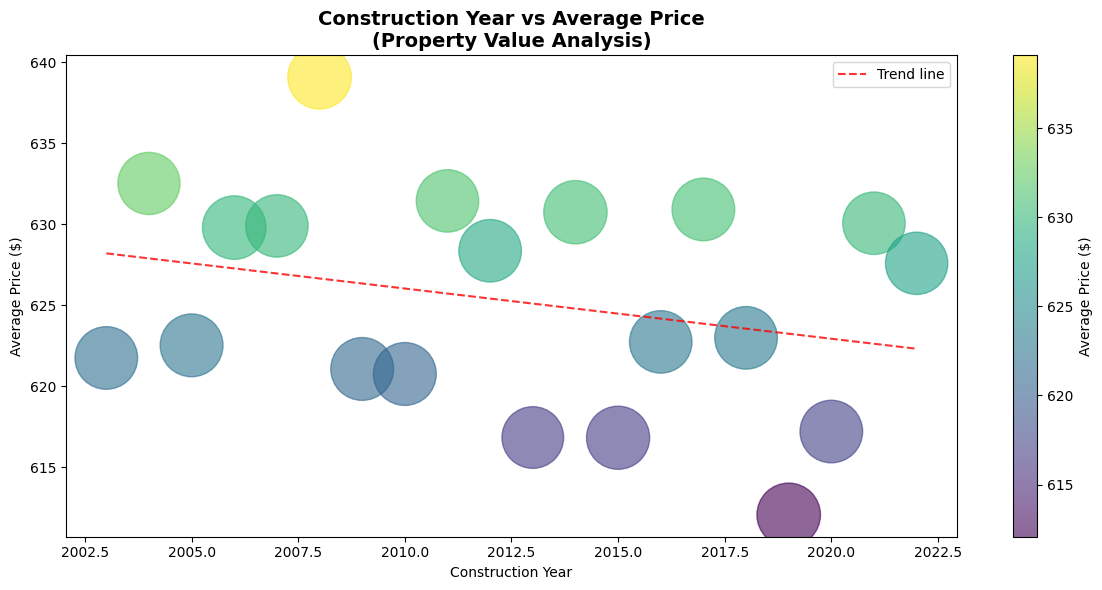

In [14]:
# 4. Relationship between construction year and price
print("\n" + "="*50)
print("4. PROPERTY AGE VS PRICING")
print("="*50)
construction_price = df.groupby('construction_year')['price_$'].agg(['mean', 'count']).reset_index()
construction_price = construction_price[construction_price['count'] > 5]  

plt.figure(figsize=(12, 6))
plt.scatter(construction_price['construction_year'], construction_price['mean'], 
           s=construction_price['count']/2, alpha=0.6, c=construction_price['mean'], cmap='viridis')
plt.colorbar(label='Average Price ($)')
plt.title('Construction Year vs Average Price\n(Property Value Analysis)', fontsize=14, fontweight='bold')
plt.xlabel('Construction Year')
plt.ylabel('Average Price ($)')

# Add trend line
if len(construction_price) > 1:
    z = np.polyfit(construction_price['construction_year'], construction_price['mean'], 1)
    p = np.poly1d(z)
    plt.plot(construction_price['construction_year'], p(construction_price['construction_year']), 
             "r--", alpha=0.8, label='Trend line')
    plt.legend()

plt.tight_layout()
plt.show()



5. TOP HOSTS ANALYSIS
Top 10 Hosts by Listings:
host name
Michael         704
David           585
John            488
Alex            429
Karen           397
Sonder (NYC)    379
Maria           352
Daniel          349
Sarah           336
Anna            334
Name: count, dtype: int64


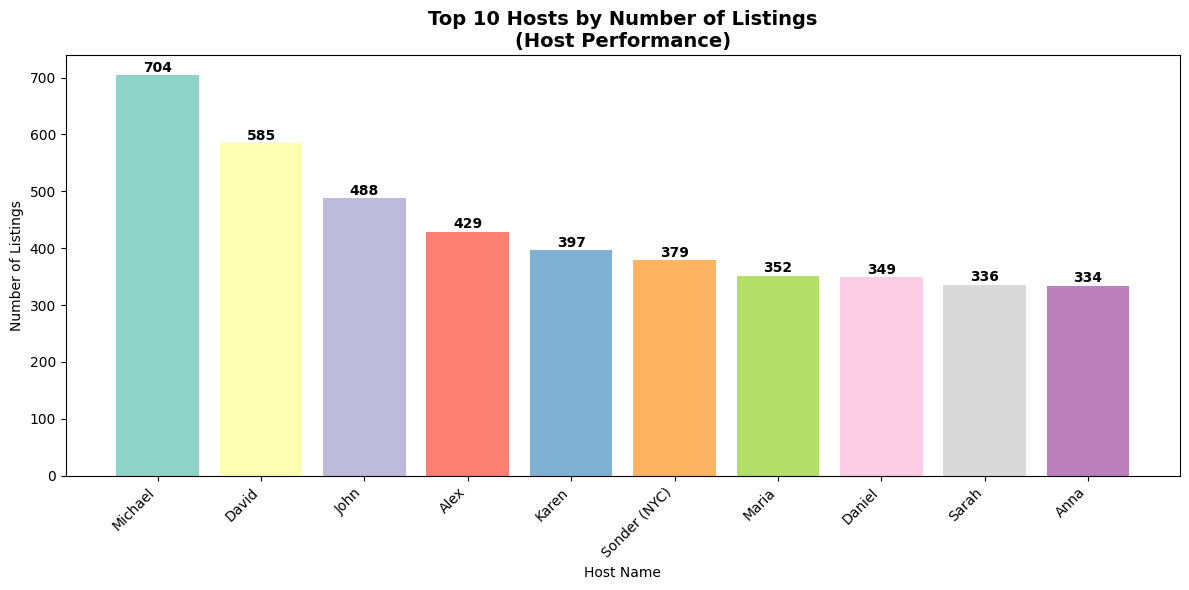

In [15]:
# 5. Top 10 hosts by listing count
print("\n" + "="*50)
print("5. TOP HOSTS ANALYSIS")
print("="*50)
top_hosts = df['host name'].value_counts().head(10)
print("Top 10 Hosts by Listings:")
print(top_hosts)

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(top_hosts)), top_hosts.values, color=plt.cm.Set3(np.arange(len(top_hosts))))
plt.title('Top 10 Hosts by Number of Listings\n(Host Performance)', fontsize=14, fontweight='bold')
plt.xlabel('Host Name')
plt.ylabel('Number of Listings')
plt.xticks(range(len(top_hosts)), top_hosts.index, rotation=45, ha='right')

for i, v in enumerate(top_hosts.values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()


6. HOST VERIFICATION & GUEST SATISFACTION
                       review rate number                price_$
                                     mean  count    std     mean
host_identity_verified                                          
unconfirmed                         3.283  40822  1.279  626.387
verified                            3.290  40834  1.278  624.159


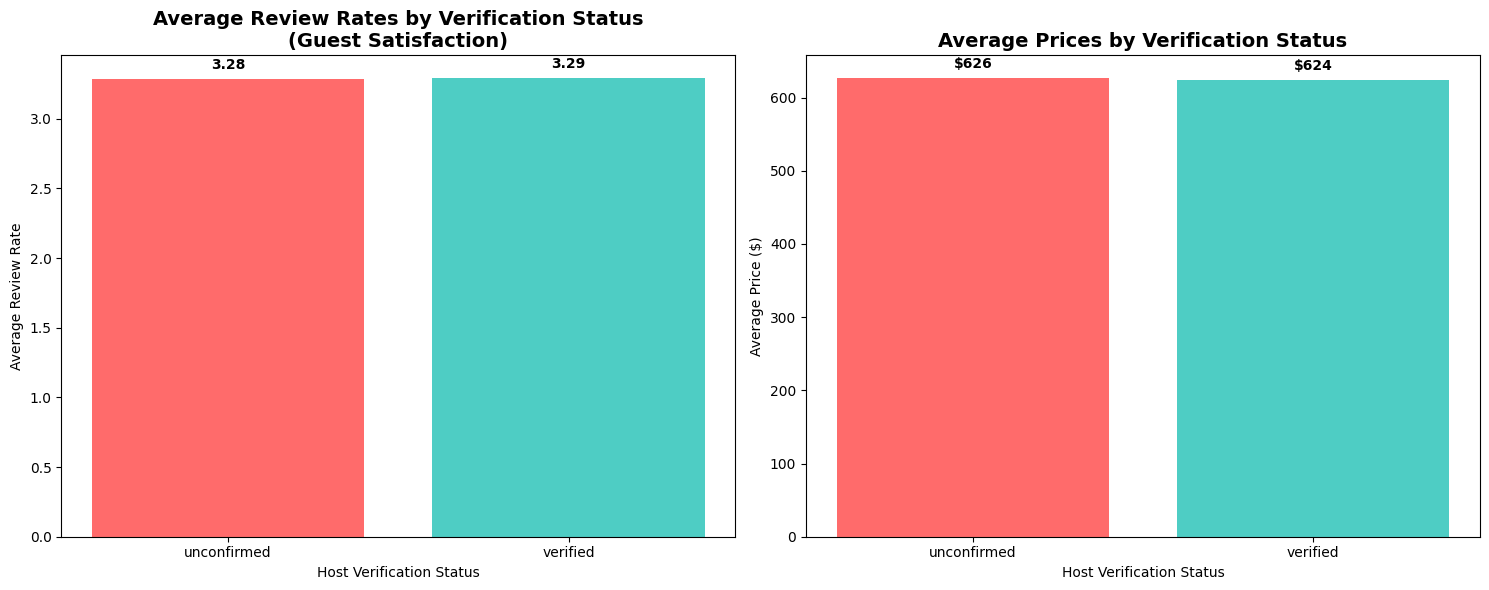

In [17]:
# 6. Host verification vs reviews
print("\n" + "="*50)
print("6. HOST VERIFICATION & GUEST SATISFACTION")
print("="*50)
verification_analysis = df.groupby('host_identity_verified').agg({
    'review rate number': ['mean', 'count', 'std'],
    'price_$': 'mean'
}).round(3)
print(verification_analysis)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Review rates by verification
verification_reviews = df.groupby('host_identity_verified')['review rate number'].mean()
ax1.bar(verification_reviews.index, verification_reviews.values, 
        color=['#FF6B6B', '#4ECDC4'])
ax1.set_title('Average Review Rates by Verification Status\n(Guest Satisfaction)', 
              fontsize=14, fontweight='bold')
ax1.set_xlabel('Host Verification Status')
ax1.set_ylabel('Average Review Rate')


for i, v in enumerate(verification_reviews.values):
    ax1.text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

# Price comparison by verification
verification_prices = df.groupby('host_identity_verified')['price_$'].mean()
ax2.bar(verification_prices.index, verification_prices.values, 
        color=['#FF6B6B', '#4ECDC4'])
ax2.set_title('Average Prices by Verification Status', fontsize=14, fontweight='bold')
ax2.set_xlabel('Host Verification Status')
ax2.set_ylabel('Average Price ($)')

for i, v in enumerate(verification_prices.values):
    ax2.text(i, v + 10, f'${v:.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


7. PRICE & SERVICE FEE CORRELATION
Correlation coefficient: 0.989
Average service fee: inf% of price


C:\Users\Harshini\AppData\Local\Temp\ipykernel_7004\238374970.py:25: RuntimeWarning: invalid value encountered in multiply
  y_range = x_range * (avg_fee_pct/100)


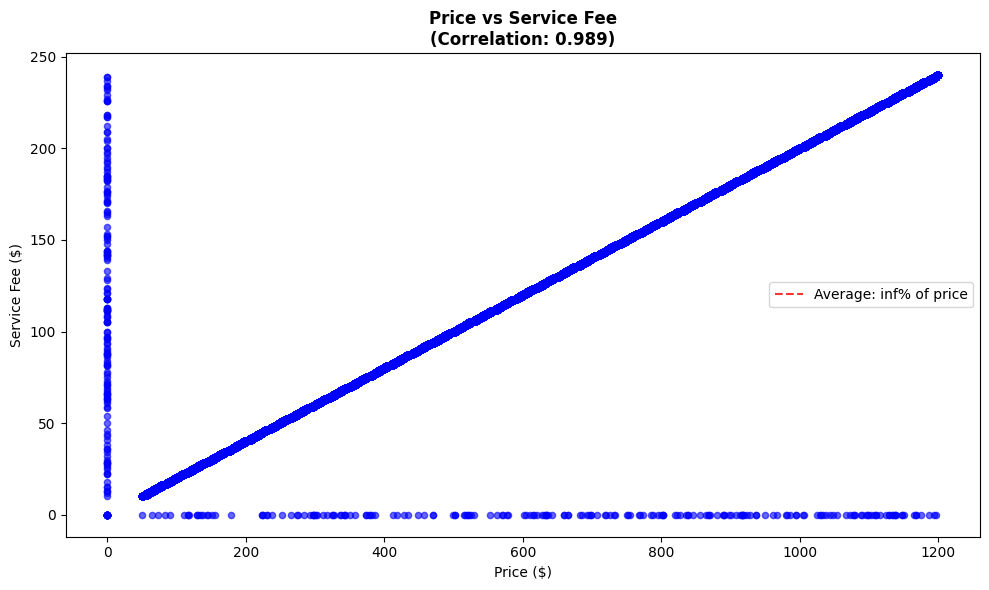

In [16]:
# 7. Correlation between price and service fee
print("\n" + "="*50)
print("7. PRICE & SERVICE FEE CORRELATION")
print("="*50)

correlation = df['price_$'].corr(df['service_fee_$'])
print(f"Correlation coefficient: {correlation:.3f}")

# Calculate service fee as percentage of price
df['service_fee_pct'] = (df['service_fee_$'] / df['price_$']) * 100
avg_fee_pct = df['service_fee_pct'].mean()

print(f"Average service fee: {avg_fee_pct:.1f}% of price")

plt.figure(figsize=(10, 6))

# scatter plot
plt.scatter(df['price_$'], df['service_fee_$'], alpha=0.6, s=20, color='blue')
plt.xlabel('Price ($)')
plt.ylabel('Service Fee ($)')
plt.title(f'Price vs Service Fee\n(Correlation: {correlation:.3f})', fontweight='bold')


x_range = np.linspace(df['price_$'].min(), df['price_$'].max(), 100)
y_range = x_range * (avg_fee_pct/100)
plt.plot(x_range, y_range, 'r--', alpha=0.8, label=f'Average: {avg_fee_pct:.1f}% of price')
plt.legend()

plt.tight_layout()
plt.show()



8. GUEST PREFERENCES & SATISFACTION
Average Review Rates by Neighborhood and Room Type:
neighbourhood_group  room type      
Bronx                Entire home/apt    3.376
                     Private room       3.323
                     Shared room        3.356
Brooklyn             Entire home/apt    3.252
                     Hotel room         3.833
                     Private room       3.284
                     Shared room        3.327
Manhattan            Entire home/apt    3.275
                     Hotel room         3.500
                     Private room       3.294
                     Shared room        3.260
Queens               Entire home/apt    3.356
                     Hotel room         3.750
                     Private room       3.318
                     Shared room        3.326
Staten Island        Entire home/apt    3.328
                     Private room       3.487
                     Shared room        3.714
brookln              Private room       4.000


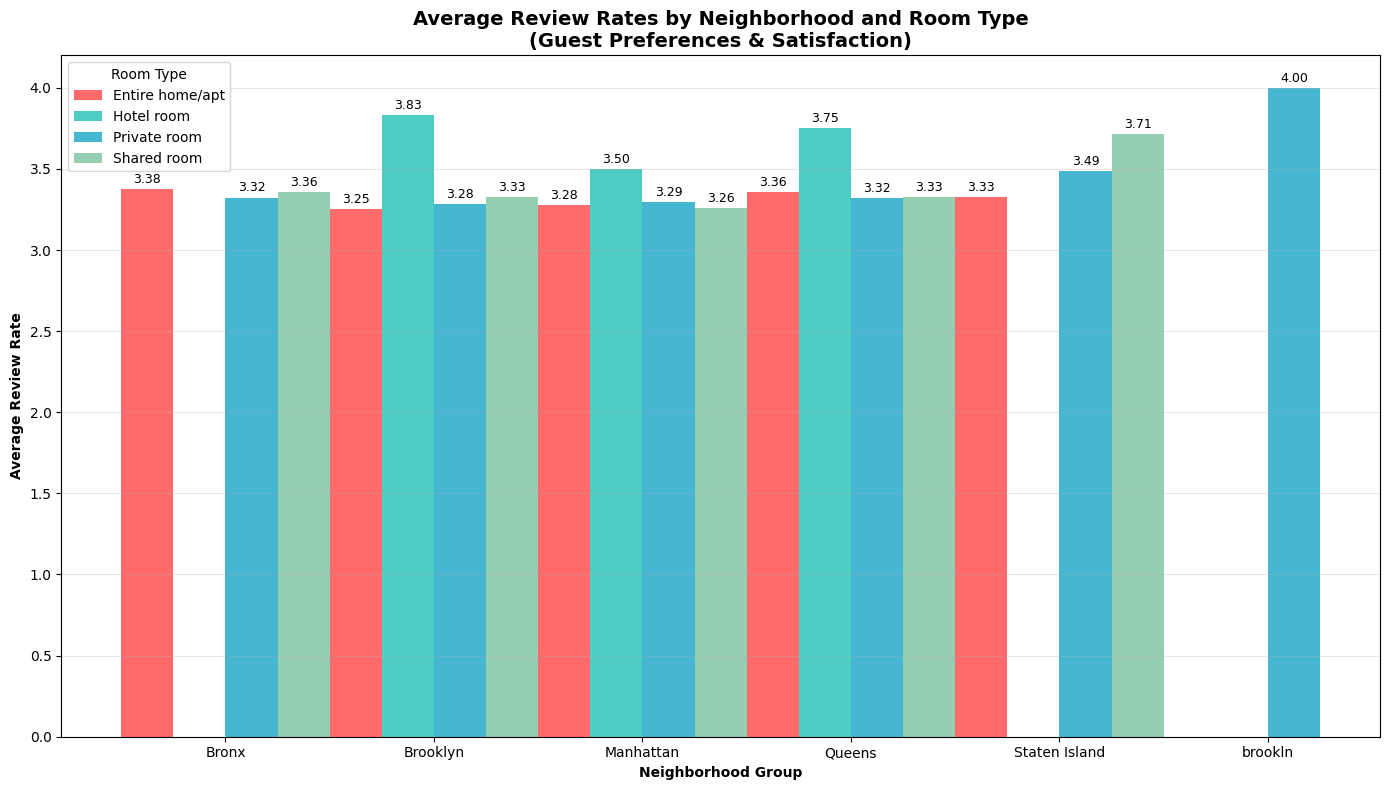


Key Insights:
Highest rated combination: ('brookln', 'Private room') with 4.00
Lowest rated combination: ('Brooklyn', 'Entire home/apt') with 3.25


In [18]:
# 8. Review rates by neighborhood and room type
print("\n" + "="*50)
print("8. GUEST PREFERENCES & SATISFACTION")
print("="*50)

review_analysis = df.groupby(['neighbourhood_group', 'room type'])['review rate number'].mean().round(3)
print("Average Review Rates by Neighborhood and Room Type:")
print(review_analysis)

pivot_table = df.pivot_table(
    index='neighbourhood_group', 
    columns='room type', 
    values='review rate number', 
    aggfunc='mean'
)

plt.figure(figsize=(14, 8))

bar_width = 0.25
x_pos = np.arange(len(pivot_table.index))

# grouped bar chart
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
room_types = pivot_table.columns

for i, room_type in enumerate(room_types):
    plt.bar(x_pos + i * bar_width, pivot_table[room_type], 
            width=bar_width, label=room_type, color=colors[i % len(colors)])

plt.xlabel('Neighborhood Group', fontweight='bold')
plt.ylabel('Average Review Rate', fontweight='bold')
plt.title('Average Review Rates by Neighborhood and Room Type\n(Guest Preferences & Satisfaction)', 
          fontsize=14, fontweight='bold')
plt.xticks(x_pos + bar_width * (len(room_types) - 1) / 2, pivot_table.index)
plt.legend(title='Room Type')
plt.grid(axis='y', alpha=0.3)

for i, neighborhood in enumerate(pivot_table.index):
    for j, room_type in enumerate(room_types):
        height = pivot_table.loc[neighborhood, room_type]
        plt.text(x_pos[i] + j * bar_width, height + 0.02, 
                f'{height:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Additional insights
print(f"\nKey Insights:")
print(f"Highest rated combination: {review_analysis.idxmax()} with {review_analysis.max():.2f}")
print(f"Lowest rated combination: {review_analysis.idxmin()} with {review_analysis.min():.2f}")


9. HOST PERFORMANCE & AVAILABILITY
Correlation coefficient: 0.148


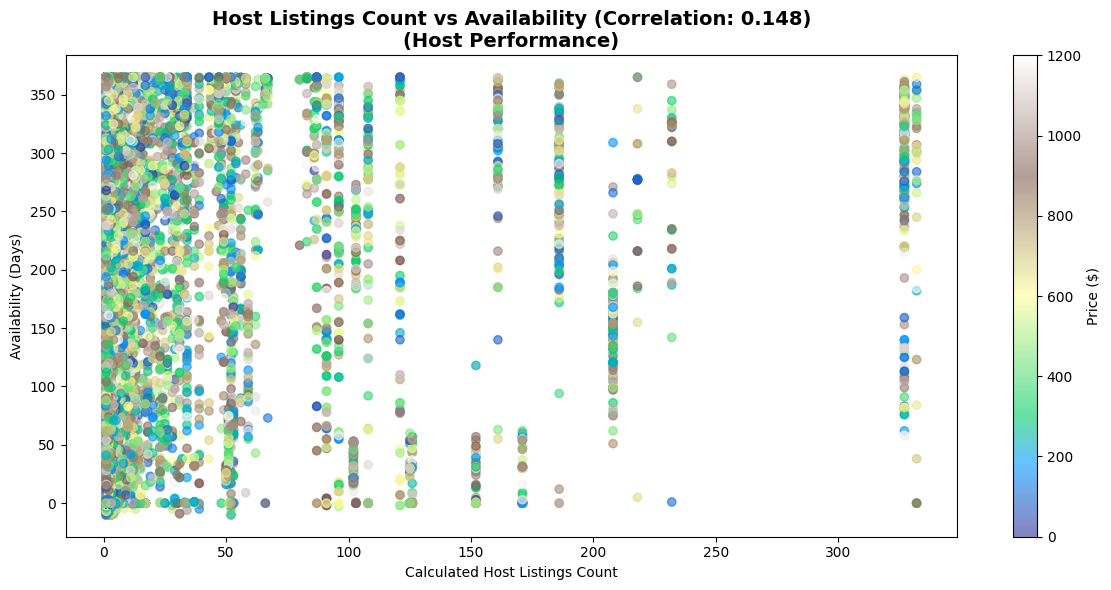

In [19]:
# 9. Host listings count vs availability
print("\n" + "="*50)
print("9. HOST PERFORMANCE & AVAILABILITY")
print("="*50)
correlation_avail = df['calculated host listings count'].corr(df['availability_365'])
print(f"Correlation coefficient: {correlation_avail:.3f}")

plt.figure(figsize=(12, 6))
plt.scatter(df['calculated host listings count'], df['availability_365'], 
           alpha=0.6, c=df['price_$'], cmap='terrain')
plt.colorbar(label='Price ($)')
plt.title(f'Host Listings Count vs Availability (Correlation: {correlation_avail:.3f})\n(Host Performance)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Availability (Days)')
plt.tight_layout()
plt.show()